# Lecture 6: Intro to Pandas Continued

In [3]:
# import pandas using the alias pd
import pandas as pd

Unlike in lecture 5, pandas is not automatically installed into this lecture. <br><br>
We can install the python package into our environment using the terminal or by using the "!" operator to have a code cell run terminal code.

In [19]:
# install pandas using the command "!pip install pandas" in this cell
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


### Load bioreactor and spectrophotometer data from the 'data' folder

In [5]:
# define varibles to store the information in the csv files 
bioreactor_df = pd.read_csv('data/bioreactor.csv')
spectro_df = pd.read_csv('data/spectrophotometer.csv')

In [6]:
# print the first 5 rows of the bioreactor_df dataframe
bioreactor_df.head()

,Time (hours),pH,Temperature (C)
0,0.0,6.964045,37.149119
1,0.5,6.918685,37.663193
2,1.0,6.827372,36.652716
3,1.5,7.017743,36.925183
4,2.0,6.959822,36.782423


In [7]:
# print the first 5 rows of the bioreactor_df dataframe
spectro_df.head()

,Time (hours),OD
0,0,5.882026
1,1,5.489369
2,2,5.933779
3,3,5.475044
4,4,4.948391


### Convert OD to grams / liter
OD = optical density. These units are arbitrary, but correlate grams per liter. Assume 1 OD = 0.34 g/L

In [8]:
# add a columm called g/L with converted biomass values
spectro_df["g/L"] = spectro_df["OD"] * 0.34
spectro_df.head()

,Time (hours),OD,g/L
0,0,5.882026,1.999889
1,1,5.489369,1.866385
2,2,5.933779,2.017485
3,3,5.475044,1.861515
4,4,4.948391,1.682453


### Merging dataframes
note: we can avoid the warning by changing the dtype of the series 'Time (hours)' to float64 using .astype() function

In [9]:
# merge the dataframes using only the common time points called merged_df
bioreactor_df["Time (hours)"] = bioreactor_df["Time (hours)"].astype("float64")
spectro_df["Time (hours)"] = spectro_df["Time (hours)"].astype("float64")
merged_df = pd.merge(bioreactor_df, spectro_df, on="Time (hours)")
merged_df.head()

,Time (hours),pH,Temperature (C),OD,g/L
0,0.0,6.964045,37.149119,5.882026,1.999889
1,1.0,6.827372,36.652716,5.489369,1.866385
2,2.0,6.959822,36.782423,5.933779,2.017485
3,3.0,7.046278,37.336147,5.475044,1.861515
4,4.0,7.005195,36.615042,4.948391,1.682453


In [10]:
# merge the dataframes using all the time points called merged_all_df
merged_all_df = pd.merge(
    bioreactor_df,
    spectro_df,
    on="Time (hours)",
    how="outer"
)
merged_all_df.head()

,Time (hours),pH,Temperature (C),OD,g/L
0,0.0,6.964045,37.149119,5.882026,1.999889
1,0.5,6.918685,37.663193,NaN,NaN
2,1.0,6.827372,36.652716,5.489369,1.866385
3,1.5,7.017743,36.925183,NaN,NaN
4,2.0,6.959822,36.782423,5.933779,2.017485


## Handling NaN values in a dataframe
There are several strategies you can use to deal with NaN (Not a Number) values in a pandas DataFrame.
- fill with a specific value
- forward fill 
- backward fill
- interpolate
- drop rows that have NaN values

### Fill with a Specific Value (fillna)
You can fill NaN values with a specific value like 0, a mean, or any other number. This approach is straightforward but can potentially skew your data analysis.

In [12]:
# fill in the missing values with the number zero using the fillna() method
merged_all_df.fillna(0, inplace=True)
merged_all_df.head()

,Time (hours),pH,Temperature (C),OD,g/L
0,0.0,6.964045,37.149119,5.882026,1.999889
1,0.5,6.918685,37.663193,0.000000,0.000000
2,1.0,6.827372,36.652716,5.489369,1.866385
3,1.5,7.017743,36.925183,0.000000,0.000000
4,2.0,6.959822,36.782423,5.933779,2.017485


### Forward Fill (ffill)
Forward fill propagates the last valid value forward to fill the NaN values. This method is particularly useful in time series data where the next valid observation is likely to be similar to the last one.

In [16]:
# use forward fill to fill in the missing values using the fillna() method
merged_all_df.ffill(inplace=True)
merged_all_df.head()

,Time (hours),pH,Temperature (C),OD,g/L
0,0.0,6.964045,37.149119,5.882026,1.999889
1,0.5,6.918685,37.663193,0.000000,0.000000
2,1.0,6.827372,36.652716,5.489369,1.866385
3,1.5,7.017743,36.925183,0.000000,0.000000
4,2.0,6.959822,36.782423,5.933779,2.017485


### Backward Fill (bfill)
Backward fill is the opposite of forward fill. It propagates the next valid value backwards to fill NaN values.

In [17]:
#  use backward fill to fill in the missing values using the bfill() method
merged_all_df.bfill(inplace=True)
merged_all_df.head()

,Time (hours),pH,Temperature (C),OD,g/L
0,0.0,6.964045,37.149119,5.882026,1.999889
1,0.5,6.918685,37.663193,0.000000,0.000000
2,1.0,6.827372,36.652716,5.489369,1.866385
3,1.5,7.017743,36.925183,0.000000,0.000000
4,2.0,6.959822,36.782423,5.933779,2.017485


### Interpolation
Interpolation is a method that estimates missing values by interpolating the values based on surrounding data points. This can be linear or more complex based on the data.



In [21]:
# use the interpolate() method to fill in the missing values
merged_all_df.interpolate(inplace=True)
merged_all_df.head()

,Time (hours),pH,Temperature (C),OD,g/L
0,0.0,6.964045,37.149119,5.882026,1.999889
1,0.5,6.918685,37.663193,0.000000,0.000000
2,1.0,6.827372,36.652716,5.489369,1.866385
3,1.5,7.017743,36.925183,0.000000,0.000000
4,2.0,6.959822,36.782423,5.933779,2.017485


### Drop Missing Values
Sometimes, if the missing data is not significant, you might choose to simply drop the rows with NaN values. However, this can result in a loss of data.

In [25]:
# use the dropna() method to drop all the rows with missing values
merged_all_df.dropna(inplace=True)
merged_all_df.head()

,Time (hours),pH,Temperature (C),OD,g/L
0,0.0,6.964045,37.149119,5.882026,1.999889
1,0.5,6.918685,37.663193,0.000000,0.000000
2,1.0,6.827372,36.652716,5.489369,1.866385
3,1.5,7.017743,36.925183,0.000000,0.000000
4,2.0,6.959822,36.782423,5.933779,2.017485


## Data Visualization Introduction
Note we will have to install the python package matplotlib using the command '!pip install matplotlib'

In [40]:
# install matplotlib using the command '!pip install matplotlib'
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


### Line plot from dataframe
```python
df.plot(x='column name', y=['line 1 column name', 'line 2 column name', 'line 3 column name',...])
```

<Axes: title={'center': 'pH, Temperature, and Biomass (g/L) Over Time'}, xlabel='Time (hours)'>

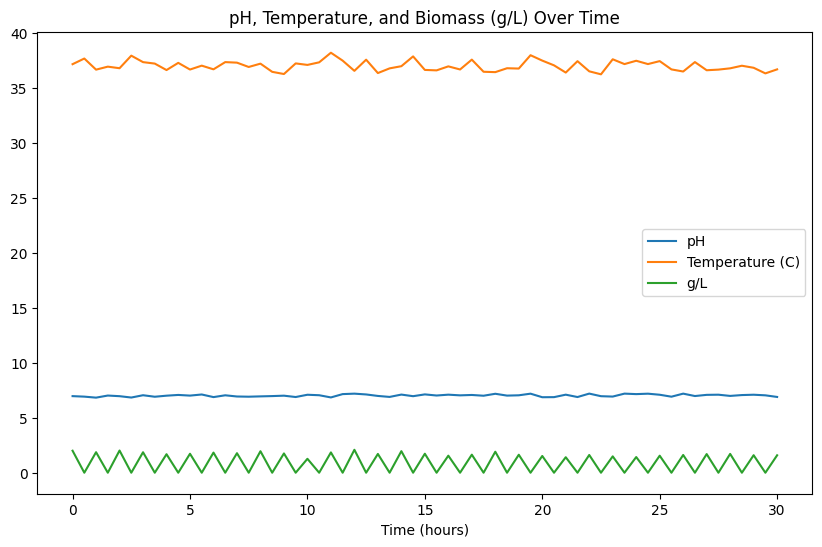

In [39]:
# make a line plot of the pH, temperature, and g/L biomass over time
merged_all_df.plot(
    x='Time (hours)',
    y=['pH', 'Temperature (C)', 'g/L'],
    figsize=(10, 6),
    title='pH, Temperature, and Biomass (g/L) Over Time'
)

### Scatter plot from dataframe
```python
ax = df.plot.scatter(x='column_name_x', y='line_1_column_name', color='Red')
df.plot.scatter(x='column_name_x', y='line_2_column_name', color='Blue', ax=ax)
```

<Axes: xlabel='g/L', ylabel='Temperature (C)'>

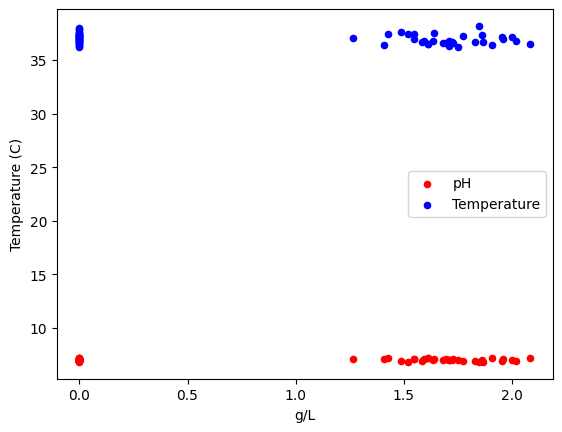

In [38]:
# make a scatter plot with biomass on the x-axis with pH and temperature on the y-axis
ax=merged_all_df.plot.scatter(
    x='g/L',
    y='pH',
    color='Red',
    label='pH'
)
merged_all_df.plot.scatter(
    x='g/L',
    y='Temperature (C)',
    color='Blue',
    label='Temperature',
    ax=ax
)

### Histogram from a pandas series
```python
df['column name'].plot.hist()
```

<Axes: ylabel='Frequency'>

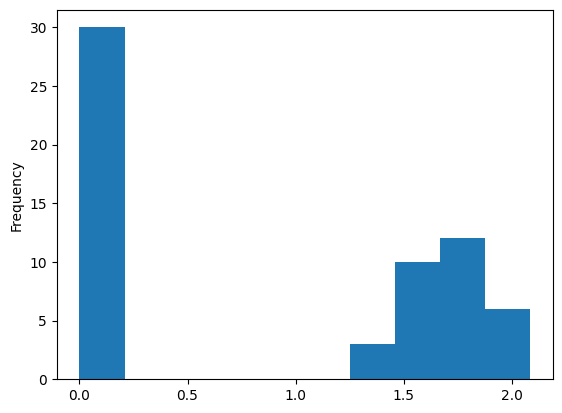

In [36]:
# make a histogram of all the values in the g/L biomass column
merged_all_df['g/L'].plot.hist()

### Box plot from series
```python
df['column name'].plot.box()
```

<Axes: >

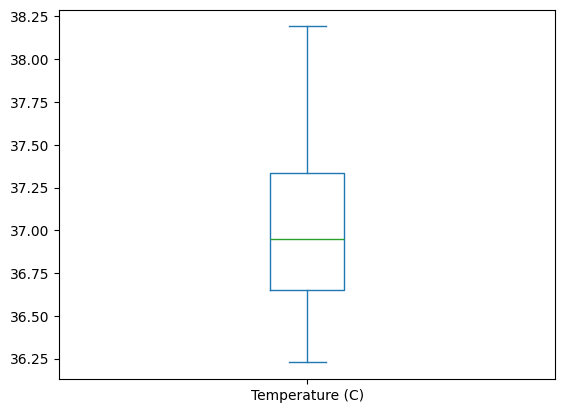

In [37]:
# make a boxplot of the all the values in the temperature column
merged_all_df['Temperature (C)'].plot.box()

### Additional Resources

[Dataframe plotting documentation](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html)